<a href="https://colab.research.google.com/github/Sunil1821/FastAIPractise/blob/master/Chapter2_Practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install fastcore==1.0.9
!pip3 install fastai==1.0.42
!pip3 install -Uqq fastbook

import fastbook
fastbook.setup_book()

#hide
from fastbook import *
from fastai.vision.all import *

  Using cached https://files.pythonhosted.org/packages/16/12/b8c2374b15d5d77b28f4d09556510cf7b47bf2364d06913c97be633da7b0/fastai-1.0.42-py3-none-any.whl
ERROR: fastbook 0.0.11 has requirement fastai>=2.0, but you'll have fastai 1.0.42 which is incompatible.
  Found existing installation: fastai 2.0.13
    Uninstalling fastai-2.0.13:
      Successfully uninstalled fastai-2.0.13


In [ ]:
!cp /content/export.pkl "/content/gdrive/My Drive/DeepLearningWebApp/"

In [ ]:
# Numpy and pandas by default assume a narrow screen - this fixes that
from fastai.vision.all import *
from nbdev.showdoc import *
from ipywidgets import widgets
from pandas.api.types import CategoricalDtype

import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 200
mpl.rcParams['savefig.dpi']= 200
mpl.rcParams['font.size']=12

set_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
pd.set_option('display.max_columns',999)
np.set_printoptions(linewidth=200)
torch.set_printoptions(linewidth=200)

import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

def get_image_files_sorted(path, recurse=True, folders=None): return get_image_files(path, recurse, folders).sorted()


# +
# pip install azure-cognitiveservices-search-imagesearch

from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth

def search_images_bing(key, term, min_sz=128):
    client = api('https://api.cognitive.microsoft.com', auth(key))
    return L(client.images.search(query=term, count=150, min_height=min_sz, min_width=min_sz).value)


# -

def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

# +
from sklearn.tree import export_graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=0, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))


# +
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()


In [ ]:
#??search_images_bing

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '2f848ee585534b8880e8fa051b7dbc5f')

In [ ]:
#We've successfully downloaded the URLs of 150 grizzly bears (or, at least, images that Bing Image Search finds for that search term). Let's look at one:

This seems to have worked nicely, so let's use fastai's download_images to download all the URLs for each of our search terms. We'll put each in a separate folder:

In [ ]:
car_types = ('Aventador','Huracan','Urus')
path = Path('lamborghini')

In [ ]:
!rm -rf lamborghini

In [ ]:
if not path.exists():
    path.mkdir()
    for o in car_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} lamborghini')
        print(results.attrgot('content_url')[:5])
        download_images(dest, urls=results.attrgot('content_url'))
        print(dest)

(#5) ['https://pictures.topspeed.com/IMG/jpg/201808/lamborghini-aventado-25.jpg','https://www.lamborghini.com/sites/it-en/files/DAM/lamborghini/model/aventador/aventador-s-roadster/04_12_Restyling/header.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/2012_Lamborghini_Aventador_(834_MY13)_LP_700-4_coupe_(2012-10-26)_01.jpg/1200px-2012_Lamborghini_Aventador_(834_MY13)_LP_700-4_coupe_(2012-10-26)_01.jpg','https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/images/16q2/667349/2016-lamborghini-aventador-lp750-4-superveloce-test-review-car-and-driver-photo-667354-s-original.jpg','https://s3.caradvice.com.au/wp-content/uploads/2017/01/2017-lamborghini-aventador-s-5.jpg']


lamborghini/Aventador
(#5) ['https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/images/15q4/662481/2016-lamborghini-huracan-lp580-2-photos-and-info-news-car-and-driver-photo-663917-s-original.jpg','https://s.aolcdn.com/commerce/autodata/images/USC80LGC051B01296.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Lamborghini_Huracan_LP610-4_%2816728125723%29.jpg/1200px-Lamborghini_Huracan_LP610-4_%2816728125723%29.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Lamborghini_Huracan_%2818503486581%29.jpg/1200px-Lamborghini_Huracan_%2818503486581%29.jpg','http://images.car.bauercdn.com/pagefiles/75195/lamborghini-huracan-01.jpg']


lamborghini/Huracan
(#5) ['https://www.carmagazine.co.uk/Images/PageFiles/78137/76_lamborghini_Urus.jpg','https://cdn.hiconsumption.com/wp-content/uploads/2019/01/Lamborghini-Urus-By-Manhart-Performance-0-Hero-1087x725.jpg','https://i.ytimg.com/vi/rgSCl-XZfUw/maxresdefault.jpg','https://95octane.com/wp-content/uploads/2017/12/lamborghini_urus_suv_95octane_9.jpg','https://www.netcarshow.com/Lamborghini-Urus-2019-wallpaper.jpg']


lamborghini/Urus


In [ ]:
fns = get_image_files(path);
fns

(#440) [Path('lamborghini/Huracan/00000036.jpg'),Path('lamborghini/Huracan/00000054.jpg'),Path('lamborghini/Huracan/00000108.jpg'),Path('lamborghini/Huracan/00000118.png'),Path('lamborghini/Huracan/00000093.jpg'),Path('lamborghini/Huracan/00000028.jpg'),Path('lamborghini/Huracan/00000120.jpg'),Path('lamborghini/Huracan/00000011.jpeg'),Path('lamborghini/Huracan/00000021.jpg'),Path('lamborghini/Huracan/00000127.jpg')...]

In [ ]:
failed = verify_images(fns);
failed.map(Path.unlink)

(#2) [None,None]

In [ ]:
#doc(verify_images)

In [ ]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
cars = cars.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cars.dataloaders(path)

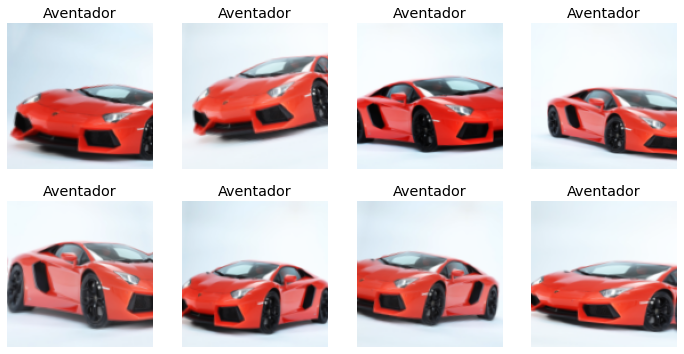

In [ ]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet152, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth



We should use something like this in prod: 

```
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
```



In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.736457,5.001057,0.597701,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.947525,2.229154,0.528736,00:17
1,0.783224,1.135871,0.356322,00:17
2,0.722199,1.077250,0.287356,00:17
3,0.608226,1.208825,0.287356,00:17
4,0.534460,1.138612,0.229885,00:16
5,0.471595,1.202775,0.229885,00:17
6,0.411502,1.139315,0.252874,00:17
7,0.362067,0.924760,0.206897,00:17
8,0.318503,0.781994,0.183908,00:17
9,0.285423,0.705531,0.160920,00:17


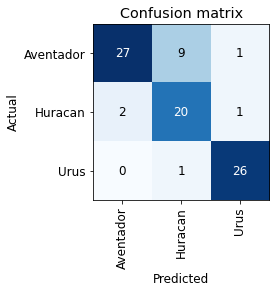

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

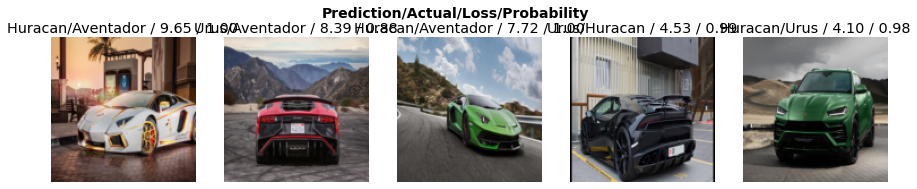

In [ ]:
interp.plot_top_losses(5, nrows=1)

Widget support isn't available as of moment in the colab

In [ ]:
#cleaner = ImageClassifierCleaner(learn)
#cleaner
# This widget will pop up a window to clean the dataset (delete them or relabel them)

NameError: ignored

In [ ]:
learn.export()

In [ ]:
path = Path()

In [ ]:
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [ ]:
inf_learner = load_learner(path/"export.pkl")

In [ ]:
path.ls()

(#5) [Path('.config'),Path('gdrive'),Path('lamborghini'),Path('export.pkl'),Path('sample_data')]

In [ ]:
Path(path/"lamborghini"/"Urus").ls()[:3]

(#3) [Path('lamborghini/Urus/00000036.jpg'),Path('lamborghini/Urus/00000054.jpg'),Path('lamborghini/Urus/00000108.jpg')]

In [ ]:
inf_learner.predict("lamborghini/Urus/00000036.jpg")

('Urus', tensor(2), tensor([1.6044e-10, 3.4033e-12, 1.0000e+00]))

In [ ]:
inf_learner.dls.vocab

(#3) ['Aventador','Huracan','Urus']